<a href="https://colab.research.google.com/github/Shanu-Mathew/Tensorflow-Notes/blob/main/Medical_Cost_Personal_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Data Ingestion
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
insurance_one_hot=pd.get_dummies(insurance,drop_first=True)
insurance_one_hot.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [5]:
# Create X & Y values
X=insurance_one_hot.drop('charges',axis=1)
y=insurance_one_hot['charges']

In [12]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,random_state=101,test_size=0.2)

In [7]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [13]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3.Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8589.0762 - mae: 8589.0762
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7797.5488 - mae: 7797.5488
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7855.2871 - mae: 7855.2871
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7624.9780 - mae: 7624.9780
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7946.6260 - mae: 7946.6260
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7824.0903 - mae: 7824.0903
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7893.7188 - mae: 7893.7188
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7560.4604 - mae: 7560.4604
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7726.3955 - mae: 7726.3955
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7726.8926 - mae: 7726.8926

In [14]:
#Model Evaluation
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8775.3213 - mae: 8775.3213


[8775.3212890625, 8775.3212890625]

In [15]:
y_train.median(),y_train.mean()

(9333.014350000001, 13381.98269974673)

### Improving Model
1. Add an extra layer with more hidden units
2. Train for longer

In [23]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [24]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5598.3687 - mae: 5598.3687


[5598.36865234375, 5598.36865234375]

In [32]:
#Model 2

#1. Create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [30]:
#Model 3 evaluation
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3446.8918 - mae: 3446.8918


[3446.891845703125, 3446.891845703125]

In [31]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5598.3687 - mae: 5598.3687


[5598.36865234375, 5598.36865234375]

Text(0.5, 0, 'epochs')

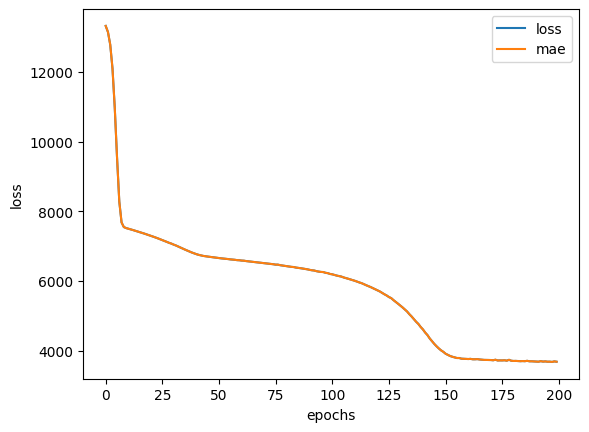

In [33]:
#Plot Model 3
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long should we train the model ?
Tensorflow has a function called [EarlyStoppingCallback]

### Preprocessing Data (Normalization and Standardization)

In [34]:
X.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


<Axes: ylabel='Frequency'>

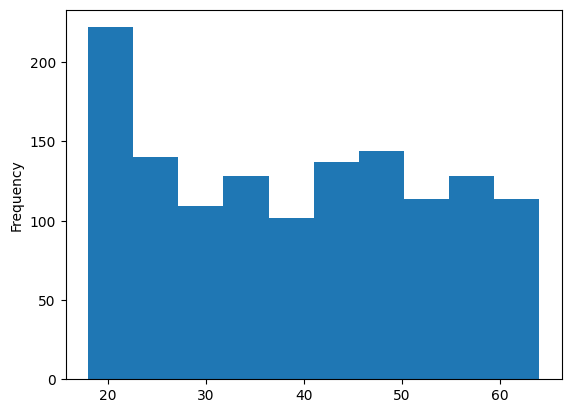

In [35]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

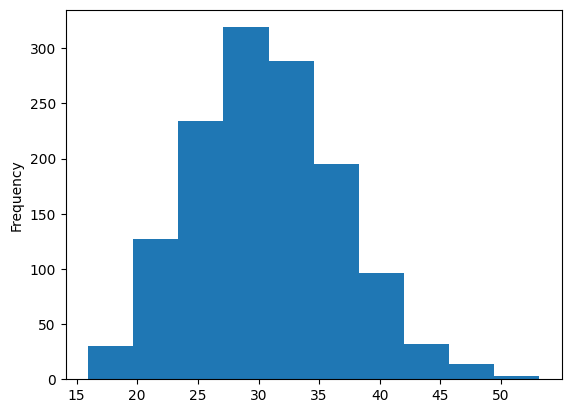

In [36]:
X["bmi"].plot(kind="hist")

In [37]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [45]:
# Libraries for preprocessing

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [48]:
#Creating a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X & y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#Train Test Split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [54]:
#Printing Normalized X_train
X_train_normal.shape,X_train.shape

((1070, 11), (1070, 6))

In [61]:
#Creating model on normalized data

#1. Create a model
ins_norm_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
ins_norm_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

#3. Fitting the model
model_info=ins_norm_model.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13343.9912 - mae: 13343.9912
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13335.0303 - mae: 13335.0303
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13313.4102 - mae: 13313.4102
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13268.3066 - mae: 13268.3066
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13188.1074 - mae: 13188.1074
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13061.5547 - mae: 13061.5547
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12878.4238 - mae: 12878.4238
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12628.7090 - mae: 12628.7090
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12302.2588 - mae: 12302.2588
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11895.70

In [64]:
ins_norm_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.1985 - mae: 3168.1985


[3168.198486328125, 3168.198486328125]

Text(0.5, 0, 'epochs')

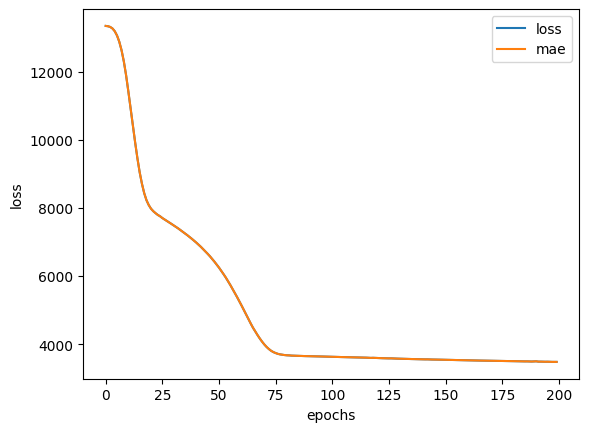

In [63]:
#Plot Model 3
pd.DataFrame(model_info.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")